In [ ]:
# fig 2
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams
from matplotlib.font_manager import FontProperties
import scipy.stats as stats
ds = pd.read_excel('/mnt/e/Research_life/water/提取数据.xlsx',header=1)
ds = ds.iloc[:28,10:13]
ds.columns = ['年份','year','GS']
ds.set_index('年份',inplace=True)
ds['year'].plot(figsize=(16,9))
ds['GS'].plot(figsize=(16,9))

In [88]:
ds.loc[:'2006',:]['year']

array([6.30741445, 6.35589354, 6.30798479, 6.31882129, 6.34220532,
       6.33079848, 6.38041825, 6.35646388, 6.37984791, 6.37129278,
       6.33365019, 6.3513308 , 6.36844106, 6.41406844, 6.35703422,
       6.38212928, 6.40323194, 6.40551331, 6.38954373, 6.41235741,
       6.4351711 , 6.43346008, 6.40608365, 6.45228137])

In [123]:
slope, intercept, r_value, p_value, std_err = stats.linregress(np.arange(1,12),ds.loc['1999':,:]['year'].values)
# slope, intercept, r_value, p_value, std_err = stats.linregress(np.arange(1,18),ds.loc[:'1999',:]['year'].values)


# slope
slope, intercept, r_value, p_value, std_err = stats.linregress(np.arange(1,12),ds.loc['1999':,:]['GS'].values)
# slope, intercept, r_value, p_value, std_err = stats.linregress(np.arange(1,18),ds.loc[:'1999',:]['GS'].values)

slope
r_value**2
intercept

0.4045956765028205

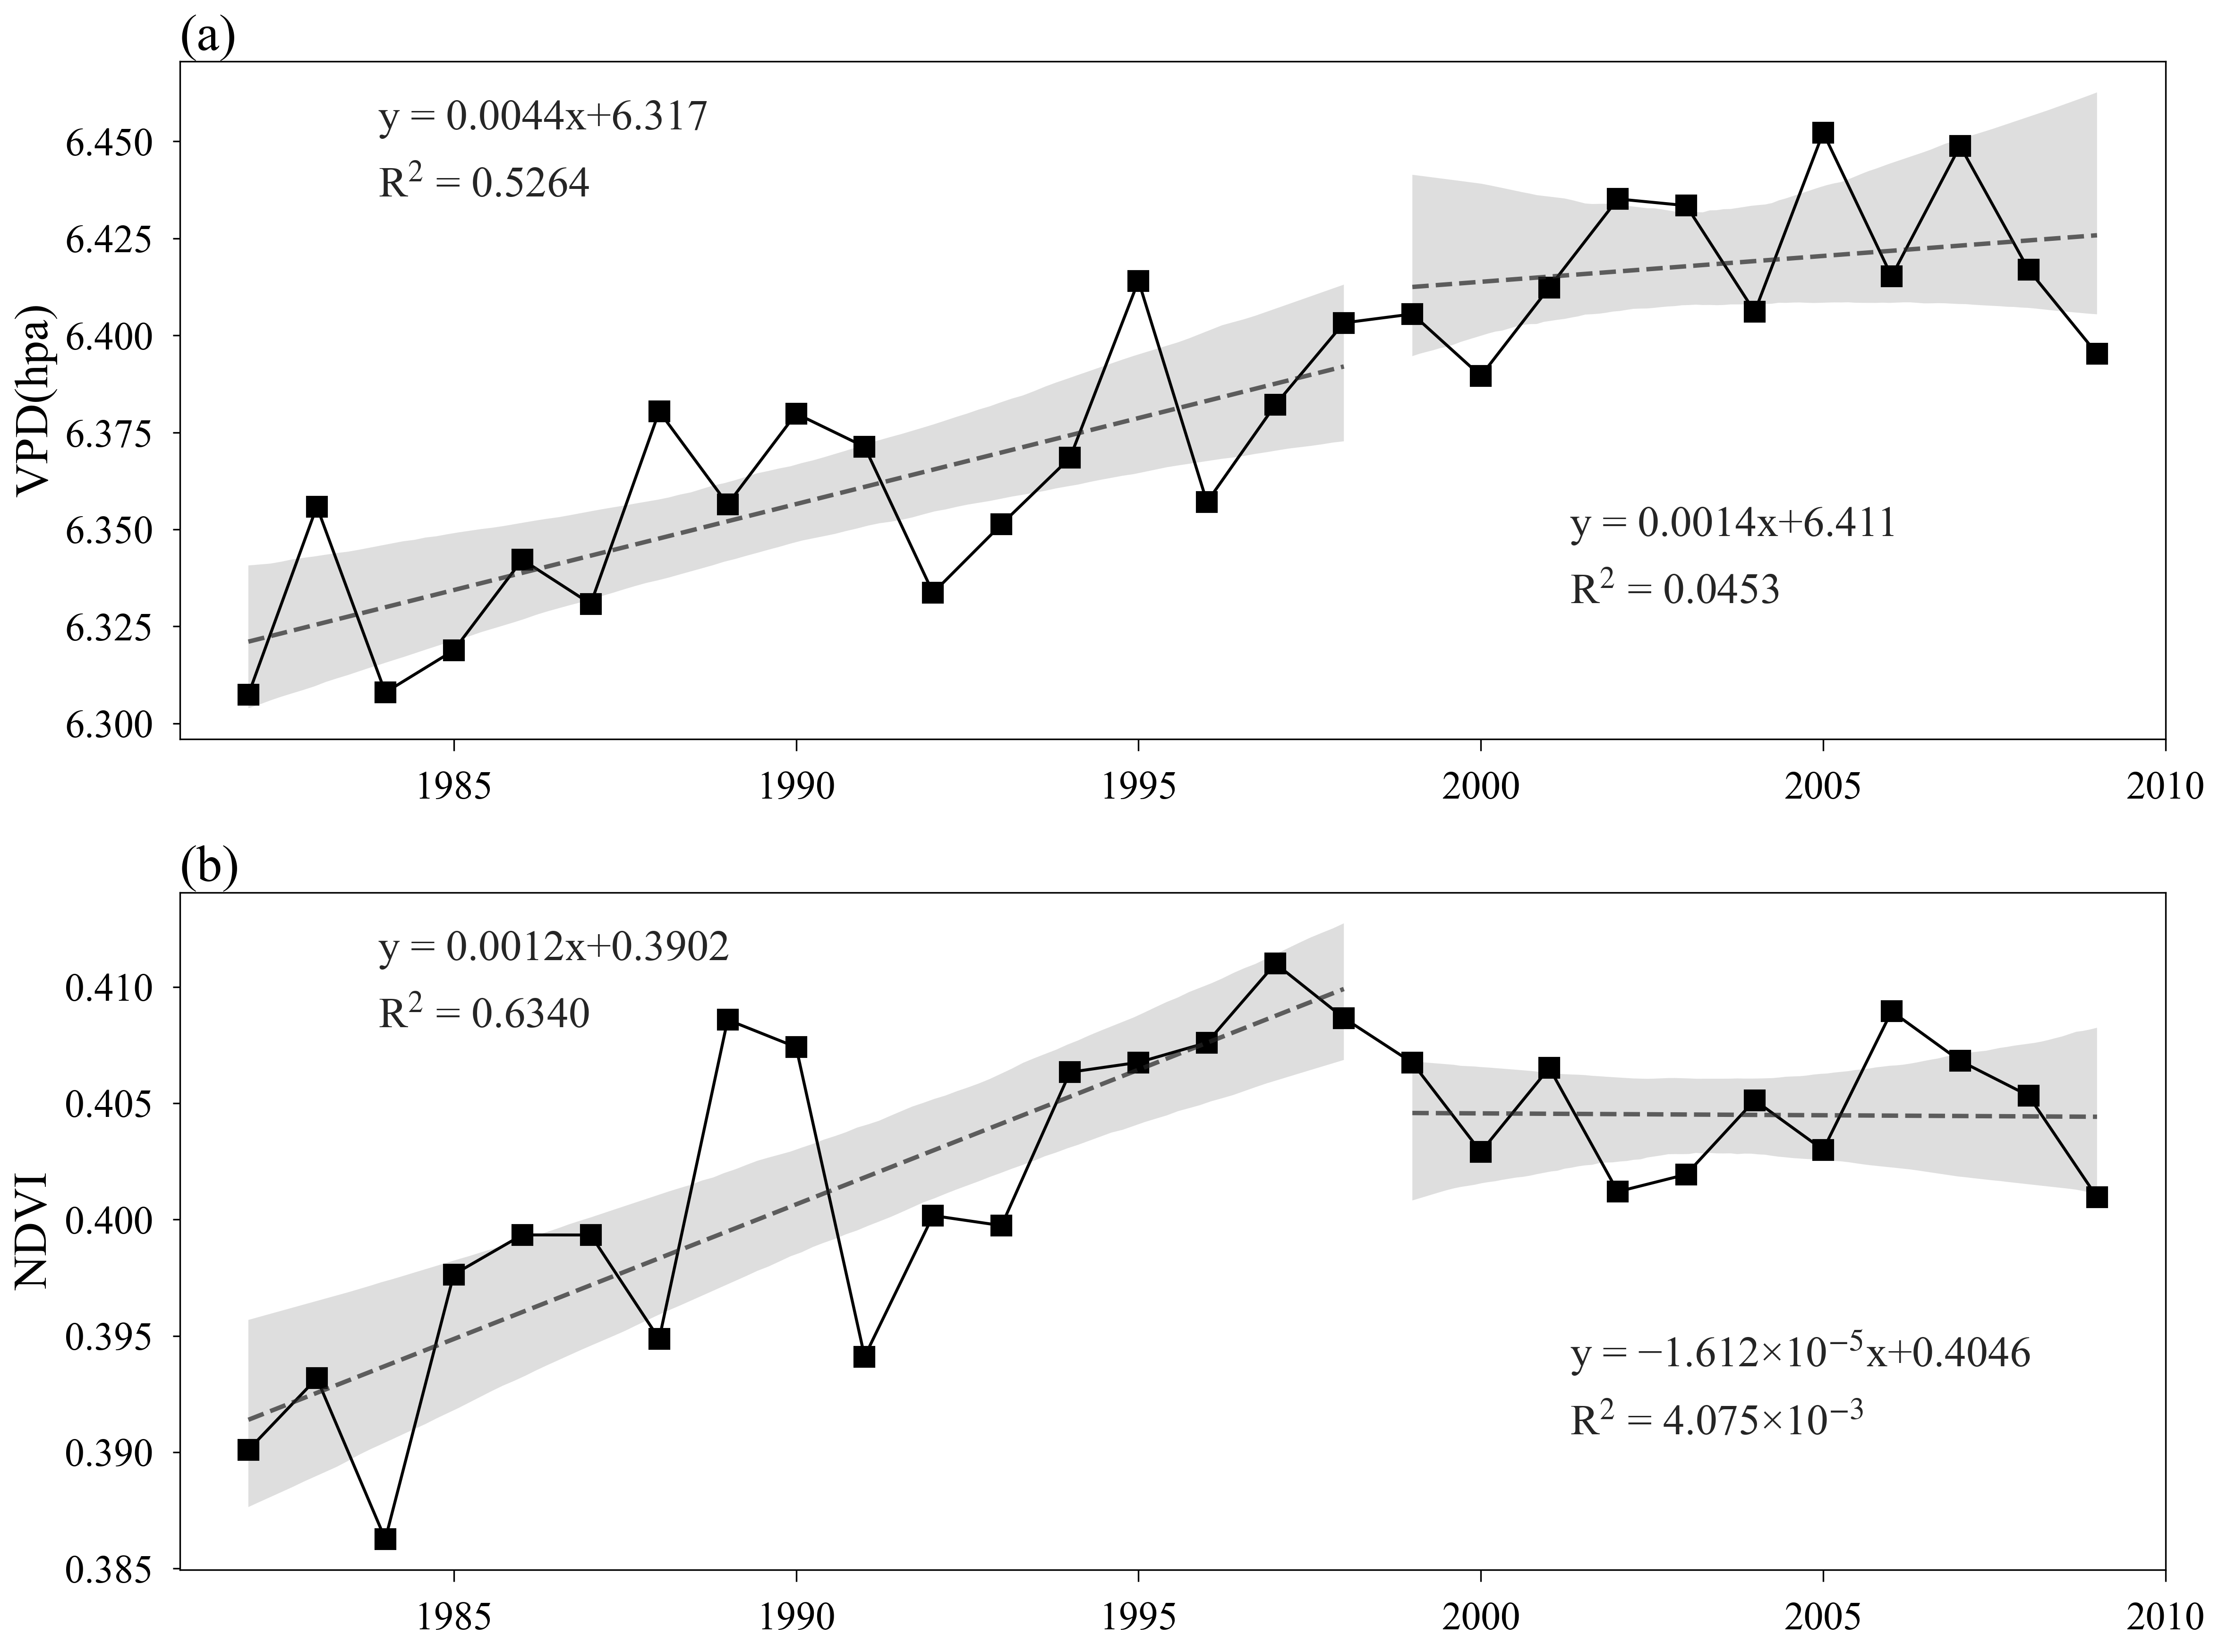

In [127]:
from matplotlib import rcParams
config = {
        "font.family": 'Times new roman',
        "font.size"  : 18,
        "font.serif" : ['SimSun'],
        "mathtext.fontset" : 'stix',
        "axes.unicode_minus": False
            
            }
rcParams.update(config)
# chinese_font = FontProperties(fname='/mnt/e/Research_life/cyq/微软雅黑.ttf')

t1 = 1982
tp = 1999
fig,ax = plt.subplots(2,1,figsize=(16,12),dpi=300)

ax1 = ax[0].plot(ds.index,ds['year'],'k',marker='s',markersize=10)
ax2 = ax[1].plot(ds.index,ds['GS'],'k',marker='s',markersize=10)

# ax[0].set_title('Year',fontsize=20,fontfamily='Times New Roman')
# ax[0].set_xlabel('year',fontsize=18,fontfamily='Times New Roman')

ax[0].set_title('(a)',loc='left',fontsize=26)
ax[1].set_title('(b)',loc='left',fontsize=26)

sns.regplot(x=ds.loc[str(t1):str(tp),:].index, y='year',  
            data=ds.loc[str(t1):str(tp),:], ax=ax[0], 
            line_kws={'color':'#252525','alpha':0.7,'linestyle':'--'},scatter=True,ci=95, order=1,
            )
# marker='s',scatter_kws={'s':30,'alpha':0.6,'color':'g'}
sns.regplot(x=ds.loc[str(tp):,:].index, y='year',  
            data=ds.loc[str(tp):,:], ax=ax[0], 
            line_kws={'color':'#252525','alpha':0.7,'linestyle':'--'},scatter=True,ci=95, order=1,
            )

sns.regplot(x=ds.loc[str(t1):str(tp),:].index, y='GS',  
            data=ds.loc[str(t1):str(tp),:], ax=ax[1], 
            line_kws={'color':'#252525','alpha':0.7,'linestyle':'--'},scatter=True,ci=95, order=1,
            )
# marker='s',scatter_kws={'s':30,'alpha':0.6,'color':'g'}
sns.regplot(x=ds.loc[str(tp):,:].index, y='GS',  
            data=ds.loc[str(tp):,:], ax=ax[1], 
            line_kws={'color':'#252525','alpha':0.7,'linestyle':'--'},scatter=True,ci=95, order=1,
            )

# ax[0].set_xlabel('年份',fontsize=20,fontproperties=chinese_font)
# ax[1].set_xlabel('年份',fontsize=20,fontproperties=chinese_font)
ax[0].set_xlabel('')
ax[1].set_xlabel('')
ax[0].set_ylabel('VPD(hpa)',fontsize=24)
ax[1].set_ylabel('NDVI',fontsize=24)
ax[0].text(.1,.90,'y = 0.0044x+6.317',c='#252525',fontsize=22, transform=ax[0].transAxes)
ax[0].text(.1,.8,'R$^2$ = 0.5264',c='#252525',fontsize=22, transform=ax[0].transAxes)
ax[0].text(.7,.30,'y = 0.0014x+6.411',c='#252525',fontsize=22, transform=ax[0].transAxes)
ax[0].text(.7,.20,'R$^2$ = 0.0453',c='#252525',fontsize=22, transform=ax[0].transAxes)

ax[1].text(.1,.90,'y = 0.0012x+0.3902',c='#252525',fontsize=22, transform=ax[1].transAxes)
ax[1].text(.1,.8,'R$^2$ = 0.6340',c='#252525',fontsize=22, transform=ax[1].transAxes)
ax[1].text(.7,.30,'y = −1.612×10$^{-5}$x+0.4046',c='#252525',fontsize=22, transform=ax[1].transAxes)
# ax[1].text(.7,.20,'R$^2$ = 2×10$^{-06}$',c='#252525',fontsize=22, transform=ax[1].transAxes,fontdict={'family' : 'Times New Roman'})
ax[1].text(.7,.20,'R$^2$ = 4.075×10$^{-3}$',c='#252525',fontsize=22, transform=ax[1].transAxes, fontdict={'family' : 'Times New Roman'})


# plt.tick_params(which='major',width=4)
ax[0].set_xlim(1981,2010)
ax[1].set_xlim(1981,2010)
ax[0].tick_params(labelsize=20,pad=10)
ax[1].tick_params(labelsize=20,pad=10)

ax[0].xaxis.set_tick_params(length =6)
ax[1].xaxis.set_tick_params(length =6)
fig.tight_layout()#调整整体空白
